## Poisonous or Not?

In [1]:
!pip install -Uqq fastai

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.3 requires absl-py~=0.10, but you have absl-py 1.0.0 which is incompatible.
tensorflow 2.6.3 requires numpy~=1.19.2, but you have numpy 1.21.5 which is incompatible.
tensorflow 2.6.3 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.3 requires wrapt~=1.12.1, but you have wrapt 1.14.0 which is incompatible.
tensorflow-transform 1.7.0 requires pyarrow<6,>=1, but you have pyarrow 7.0.0 which is incompatible.
tensorflow-transform 1.7.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,<2.9,>=1.15.5, but you have tensorflow 2.6.3 which is incompatible.
tensorflow-serving-api 2.8.0 requires tensorflow<3,>=2.8.0, but you have tensorflow 2.6.3 which i

searches for updates

In [2]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [3]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
pytorch-lightning 1.6.0 requires typing-extensions>=4.0.0, but you have typing-extensions 3.10.0.2 which is incompatible.
google-cloud-aiplatform 0.6.0a1 requires google-cloud-storage<2.0.0dev,>=1.26.0, but you have google-cloud-storage 2.1.0 which is incompatible.
gcsfs 2022.2.0 requires fsspec==2022.02.0, but you have fsspec 2022.3.0 which is incompatible.
en-core-web-sm 3.2.0 requires spacy<3.3.0,>=3.2.0, but you have spacy 3.5.2 which is incompatible.
en-core-web-lg 3.2.0 requires spacy<3.3.0,>=3.2.0, but you have spacy 3.5.2 which is incompatible.
apache-beam 2.37.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.4 which is incompatible.
apache-beam 2.37.0 requires httplib2<0.20.0,>=0.8, but you have httplib2 0.20.4 

In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

searches for photos on duckduckgo

In [5]:
urls = search_images('poisonous spider photos', max_images=1)
urls[0]

Searching for 'poisonous spider photos'


'https://drivebyeexterminators.com/wp-content/uploads/2020/10/spiders--1024x678.jpeg'

search 1

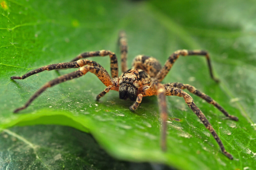

In [6]:
from fastdownload import download_url
dest = 'poisonous.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

search for item 2

Searching for 'non-poisonous spider photos'


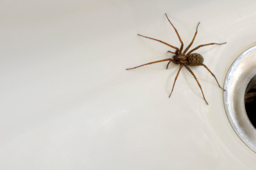

In [7]:
download_url(search_images('non-poisonous spider photos', max_images=1)[0], 'nonpoisonousspider.jpg', show_progress=False)
Image.open('nonpoisonousspider.jpg').to_thumb(256,256)

take a few of what was found and do some searches for different lightings

In [8]:
searches = 'non-poisonous spider','poisonous spider'
path = Path('poisonous_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} wild photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} zoo photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'non-poisonous spider photo'
Searching for 'non-poisonous spider wild photo'
Searching for 'non-poisonous spider zoo photo'
Searching for 'poisonous spider photo'
Searching for 'poisonous spider wild photo'
Searching for 'poisonous spider zoo photo'


removes photos not downloaded correctly

In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

the training set used to train the AI, dataloaders.

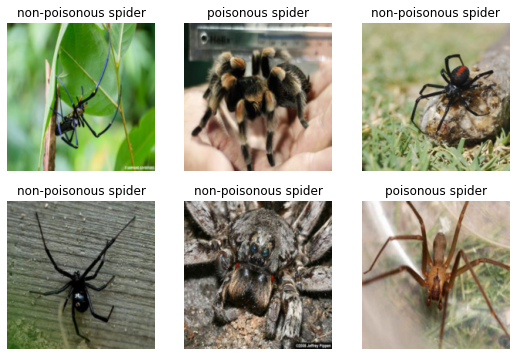

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

using resnet18 as it is the fastest. Trains

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.271551,0.944141,0.393939,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.665732,0.594924,0.272727,00:13
1,0.452250,0.851162,0.272727,00:13
2,0.342474,0.849696,0.303030,00:14


In [12]:
is_poisonous,_,probability = learn.predict('poisonous.jpg')
print(f"These is a {is_poisonous}.")
print(f"Probability it's poisonous: {probability[0]:.4f}")

These is a poisonous spider.
Probability it's poisonous: 0.0043


Result above